In [6]:
import pandas as pd
from datetime import datetime

data = pd.read_csv("Weather.csv")
data = data.drop("Precipitation (inches)", axis=1)
data = data.drop("Snow (inches)", axis=1)

data

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation
0,1,6,-9,True
1,2,1,-15,False
2,3,7,-14,False
3,4,7,-10,False
4,5,10,-9,False
...,...,...,...,...
9143,361,27,9,True
9144,362,25,6,True
9145,363,17,2,False
9146,364,22,9,True


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(columns=["Precipitation"])
y = data["Precipitation"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 29)


model = RandomForestClassifier(max_depth = 10, min_samples_leaf = 19, min_samples_split = 19)
model.fit(X_train.values, y_train)

### [[date, maximum temp, minimum temp]] ###

predictions = model.predict([[39, 7, 23]])
predictions1 = model.predict(X_test)
score = accuracy_score(y_test, predictions1)
print(predictions, f"\nAccuracy: {score}")

[ True] 
Accuracy: 0.6812386156648452


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    # Define the model with the parameters to be optimized
    estimator = RandomForestRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=2
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() # The optimizer tries to maximize the function, so we negate the score to minimize it

# Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=1,
)

optimizer.maximize(n_iter=100, init_points=6) # Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.2135   | 8.923     | 14.69     | 2.002     |
| 2         | -0.2174   | 6.744     | 3.788     | 3.662     |
| 3         | -0.2268   | 4.539     | 7.566     | 9.142     |
| 4         | -0.2154   | 11.24     | 8.965     | 14.33     |
| 5         | -0.2268   | 4.885     | 17.68     | 2.493     |
| 6         | -0.217    | 13.74     | 8.929     | 12.06     |
| 7         | -0.2133   | 10.01     | 14.39     | 3.159     |
| 8         | -0.2139   | 9.998     | 10.71     | 2.185     |
| 9         | -0.2145   | 14.31     | 13.87     | 2.128     |
| 10        | -0.2191   | 16.31     | 7.107     | 2.291     |
| 11        | -0.2127   | 13.58     | 19.21     | 2.56      |
| 12        | -0.213    | 16.54     | 18.72     | 6.437     |
| 13        | -0.2128   | 19.01     | 19.52     | 2.883     |
| 14        | -0.2128   | 19.92     | 19.3      | 12.94     |
| 15    

In [43]:
y_predicted = model.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1043,  388],
       [ 481,  833]])

Text(95.72222222222221, 0.5, 'Actual')

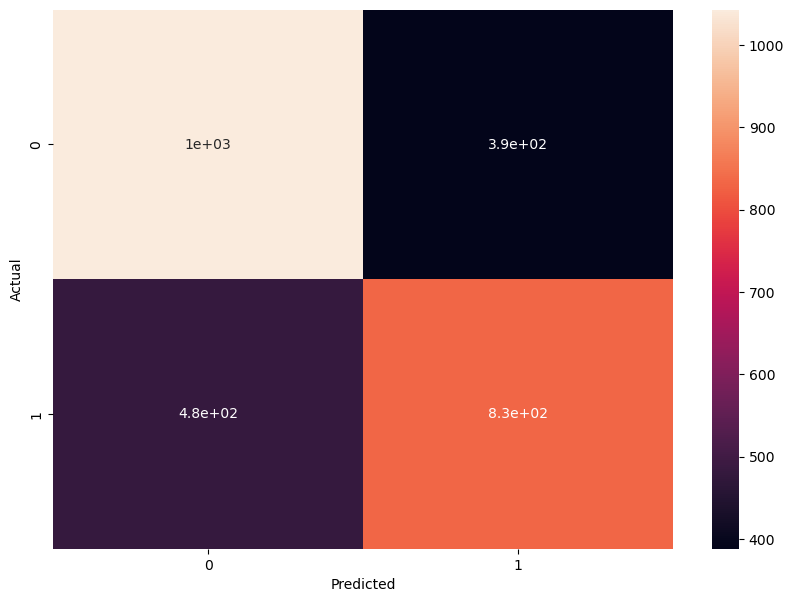

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")